## 1. Import

In [ ]:
# !pip install tqdm -q

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm

# C:\Windows\Fonts   # ==> OS에 등록되어 있는 모든 폰트 파일들
font_path = 'C:\\Windows\\Fonts\\H2GTRM.TTF' # 윈도우 OS 폰트 경로
#font_path = 'C:\\Windows\\Fonts\\batang.ttc' # 윈도우 OS 폰트 경로

font_prop = fm.FontProperties(fname = font_path) # 폰트경로에 있는 폰트 이름들 뽑아오자.


font_name = font_prop.get_name() # 폰트명

#matplotlib.rc('font', key=value)
matplotlib.rc('font', family=font_name)

# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용
plt.rc('axes', unicode_minus=False) # matplotlib의 기본적인 유니코드 minus폰트사용 중지

## 2. 데이터 전처리

### train.csv 탐색

In [4]:
train = pd.read_csv('../data/train.csv')
train.head(3)

,item_id,year,month,seq,type,hs4,weight,quantity,value
0,DEWLVASR,2022,1,1.0,1,3038,14858.0,0.0,32688.0
1,ELQGMQWE,2022,1,1.0,1,2002,62195.0,0.0,110617.0
2,AHMDUILJ,2022,1,1.0,1,2102,18426.0,0.0,72766.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10836 entries, 0 to 10835
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item_id   10836 non-null  object 
 1   year      10836 non-null  int64  
 2   month     10836 non-null  int64  
 3   seq       10836 non-null  float64
 4   type      10836 non-null  int64  
 5   hs4       10836 non-null  int64  
 6   weight    10836 non-null  float64
 7   quantity  10836 non-null  float64
 8   value     10836 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 762.0+ KB


In [7]:
train.describe()


,year,month,seq,type,hs4,weight,quantity,value
count,10836.000000,10836.000000,10836.000000,10836.0,10836.000000,1.083600e+04,1.083600e+04,1.083600e+04
mean,2023.331395,6.108435,2.034238,1.0,4821.969546,1.098413e+06,8.633771e+04,1.739442e+06
std,1.049357,3.392649,0.813380,0.0,2296.892536,5.153790e+06,7.614669e+06,5.457480e+06
min,2022.000000,1.000000,1.000000,1.0,1210.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2022.000000,3.000000,1.000000,1.0,2833.000000,3.457500e+02,0.000000e+00,1.150675e+04
50%,2023.000000,6.000000,2.000000,1.0,3824.000000,6.532500e+03,0.000000e+00,1.250070e+05
75%,2024.000000,9.000000,3.000000,1.0,7202.000000,1.555108e+05,0.000000e+00,1.039764e+06
max,2025.000000,12.000000,3.000000,1.0,9403.000000,1.104919e+08,7.925990e+08,1.110414e+08


In [8]:
max_len_1cnt = 43*100*1; print(f'max_len_1cnt = {max_len_1cnt}')
max_len_2cnt = 43*100*2; print(f'max_len_2cnt = {max_len_2cnt}')
max_len_3cnt = 43*100*3; print(f'max_len_3cnt = {max_len_3cnt}')
print(f'len(train)/max_len_1cnt = {len(train)/max_len_1cnt}') # 2.52... =>
print(f'len(train)/max_len_2cnt = {len(train)/max_len_2cnt}') # 1.26... =>  
print(f'len(train)/max_len_3cnt = {len(train)/max_len_3cnt}') # 0.84... => 실제 한달에 3번씩 구매하지 않은 상품들이 존재한다는 이야기 

max_len_1cnt = 4300
max_len_2cnt = 8600
max_len_3cnt = 12900
len(train)/max_len_1cnt = 2.52
len(train)/max_len_2cnt = 1.26
len(train)/max_len_3cnt = 0.84


In [9]:
print(f'train.shape = {train.shape}')
display(train.apply(lambda x: len(np.unique(x)), axis=0))
display(train.apply(lambda x: np.unique(x), axis=0))

train.shape = (10836, 9)


item_id      100
year           4
month         12
seq            3
type           1
hs4           71
weight      7438
quantity    1226
value       9686
dtype: int64

item_id     [AANGBULD, AHMDUILJ, ANWUJOKX, APQGTRMF, ATLDM...
year                                 [2022, 2023, 2024, 2025]
month                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
seq                                           [1.0, 2.0, 3.0]
type                                                      [1]
hs4         [1210, 2002, 2102, 2501, 2529, 2612, 2701, 271...
weight      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
quantity    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
value       [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
dtype: object

In [ ]:
# year : 전체 trend, 전체 데이터에서의 상관관계
# month : 이전 년도와 변화된량으로 상관관계(계절성/주기성)
# hs4 : 같은 범주(공통 중분류)에 속하는 제품간에 상관관계
# seq: 같은 범주(공통 구입횟수)에 속하는 제품간에 상관관계
# weight: categorization -> 같은 범주(weight-value기울기)에서의 상관관계 

##### => 더 해볼수 있는것은 quantity가 zero vs. non-zero로 나누어서 

In [10]:
train['hs4'].is_unique, train['hs4'].nunique(), train['hs4'].unique()

(False,
 71,
 array([3038, 2002, 2102, 2501, 2529, 2805, 2807, 2811, 2814, 2825, 2833,
        2836, 2841, 2846, 2847, 2916, 3006, 3102, 3206, 3207, 3215, 3307,
        3404, 3806, 3815, 3824, 3904, 3909, 4202, 4601, 4802, 5111, 5205,
        5309, 5402, 5515, 5602, 5609, 5705, 6101, 6211, 7202, 7207, 8102,
        8105, 8461, 8467, 8479, 8501, 8505, 8527, 8708, 8714, 9403, 1210,
        3813, 4408, 4810, 5512, 2701, 7907, 2710, 6006, 5119, 9022, 4403,
        3003, 2612, 4302, 7142, 3024]))

In [11]:
train['hs4'].value_counts()

hs4
2805    646
3824    535
2811    516
8501    423
8505    387
       ... 
4302      9
7142      8
2612      6
3024      5
3003      2
Name: count, Length: 71, dtype: int64

### monthly data 탐색

In [12]:
# year, month, item_id 기준으로 value 합산 (seq만 다르다면 value 합산)
monthly = (
    train
    .groupby(["item_id", "year", "month"], as_index=False)["value"]
    .sum()
)

# year, month를 하나의 키(ym)로 묶기
monthly["ym"] = pd.to_datetime(
    monthly["year"].astype(str) + "-" + monthly["month"].astype(str).str.zfill(2)
)

monthly.head()

,item_id,year,month,value,ym
0,AANGBULD,2022,1,14276.0,2022-01-01
1,AANGBULD,2022,2,52347.0,2022-02-01
2,AANGBULD,2022,3,53549.0,2022-03-01
3,AANGBULD,2022,5,26997.0,2022-05-01
4,AANGBULD,2022,6,84489.0,2022-06-01


In [13]:
# train = pd.read_csv('../data/train.csv')

# # year, month, item_id 기준으로 value 합산 (seq만 다르다면 value 합산)
# monthly = (
#     train
#     .groupby(["item_id", "year", "month"], as_index=False)["value"]
#     .sum()
# )

# # year, month를 하나의 키(ym)로 묶기
# monthly["ym"] = pd.to_datetime(
#     monthly["year"].astype(str) + "-" + monthly["month"].astype(str).str.zfill(2)
# )

# item_id × ym 피벗 (월별 총 무역량 매트릭스 생성)
pivot = (
    monthly
    .pivot(index="item_id", columns="ym", values="value")
    .fillna(0.0)
)

pivot.head()

ym,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,...,2024-10-01,2024-11-01,2024-12-01,2025-01-01,2025-02-01,2025-03-01,2025-04-01,2025-05-01,2025-06-01,2025-07-01
item_id,,,,,,,,,,,,,,,,,,,,,
AANGBULD,14276.0,52347.0,53549.0,0.0,26997.0,84489.0,0.0,0.0,0.0,0.0,...,428725.0,144248.0,26507.0,25691.0,25805.0,0.0,38441.0,0.0,441275.0,533478.0
AHMDUILJ,242705.0,120847.0,197317.0,126142.0,71730.0,149138.0,186617.0,169995.0,140547.0,89292.0,...,123085.0,143451.0,78649.0,125098.0,80404.0,157401.0,115509.0,127473.0,89479.0,101317.0
ANWUJOKX,0.0,0.0,0.0,63580.0,81670.0,26424.0,8470.0,0.0,0.0,80475.0,...,0.0,0.0,0.0,27980.0,0.0,0.0,0.0,0.0,0.0,0.0
APQGTRMF,383999.0,512813.0,217064.0,470398.0,539873.0,582317.0,759980.0,216019.0,537693.0,205326.0,...,683581.0,2147.0,0.0,25013.0,77.0,20741.0,2403.0,3543.0,32430.0,40608.0
ATLDMDBO,143097177.0,103568323.0,118403737.0,121873741.0,115024617.0,65716075.0,146216818.0,97552978.0,72341427.0,87454167.0,...,60276050.0,30160198.0,42613728.0,64451013.0,38667429.0,29354408.0,42450439.0,37136720.0,32181798.0,57090235.0


## 3. 공행성쌍 탐색
- 각 (A, B) 쌍에 대해 lag = 1 ~ max_lag까지 Pearson 상관계수 계산
- 절댓값이 가장 큰 상관계수와 lag를 선택
- |corr| >= corr_threshold이면 A→B 공행성 있다고 판단

In [38]:
def safe_corr(x, y):
    if np.std(x) == 0 or np.std(y) == 0:
        return 0.0
    return float(np.corrcoef(x, y)[0, 1])

def find_comovement_pairs(pivot, max_lag=6, min_nonzero=12, corr_threshold=0.4):
    items = pivot.index.to_list()
    months = pivot.columns.to_list()
    n_months = len(months)

    results = []

    for i, leader in tqdm(enumerate(items)):
        x = pivot.loc[leader].values.astype(float)
        if np.count_nonzero(x) < min_nonzero:
            continue

        for follower in items:
            if follower == leader:
                continue

            y = pivot.loc[follower].values.astype(float)
            if np.count_nonzero(y) < min_nonzero:
                continue

            best_lag = None
            best_corr = 0.0

            # lag = 1 ~ max_lag 탐색
            for lag in range(1, max_lag + 1):
                if n_months <= lag:
                    continue
                corr = safe_corr(x[:-lag], y[lag:])
                if abs(corr) > abs(best_corr):
                    best_corr = corr
                    best_lag = lag

            # 임계값 이상이면 공행성쌍으로 채택
            if best_lag is not None and abs(best_corr) >= corr_threshold:
                results.append({
                    "leading_item_id": leader,
                    "following_item_id": follower,
                    "best_lag": best_lag,
                    "max_corr": best_corr,
                })

    pairs = pd.DataFrame(results)
    return pairs

pairs = find_comovement_pairs(pivot)
print("탐색된 공행성쌍 수:", len(pairs))
pairs.head()

100it [00:06, 14.88it/s]

탐색된 공행성쌍 수: 1425


,leading_item_id,following_item_id,best_lag,max_corr
0,AANGBULD,APQGTRMF,5,-0.443984
1,AANGBULD,DEWLVASR,6,0.640221
2,AANGBULD,DNMPSKTB,4,-0.410635
3,AANGBULD,EVBVXETX,6,0.436623
4,AANGBULD,FTSVTTSR,3,0.531400


In [39]:
#####
##### default 탐색된 공행성쌍 EDA (lag: 1 ~ 6 처리해서 얻은 공행성 쌍)
#####

In [40]:
pairs_mod = pairs.copy()
pairs_mod['max_corr_abs'] = pairs_mod['max_corr'].apply(np.abs)
pairs_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   leading_item_id    1425 non-null   object 
 1   following_item_id  1425 non-null   object 
 2   best_lag           1425 non-null   int64  
 3   max_corr           1425 non-null   float64
 4   max_corr_abs       1425 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 55.8+ KB


In [41]:
df_pairs_mod = pairs_mod.groupby('leading_item_id')['following_item_id'] \
    .aggregate(["size"]).sort_values(by='size', ascending=False) # or 'count'
df_pairs_mod    

###
### ==> 따라서 100개 아이템중 9개는 공행성쌍이 탐지 되지않았다. ==> 공행성쌍이 탐지 vs. 공행성쌍이 탐지 실패 아이템으로 cat. 가능
###

dct_pair_detection = {'comv_yes':df_pairs_mod.index.to_list() , 
                      'comv_no': set(train['item_id']).difference(set(df_pairs_mod.index.to_list()))}
print("공행성이 탐지되지 않은 상품수: ", len(dct_pair_detection['comv_no']))
print("공행성이 탐지되지 않은 상품id: ", dct_pair_detection['comv_no'])
print("공행성 탐지된 상품수: ", len(dct_pair_detection['comv_yes']))
print("공행성이 탐지된 상품id: ", dct_pair_detection['comv_yes']) 


공행성이 탐지되지 않은 상품수:  9
공행성이 탐지되지 않은 상품id:  {'RJCAXSGH', 'ANWUJOKX', 'PLMZALFA', 'KFQSHBNH', 'QSDCUCLB', 'TANNMIMB', 'GIKPEWTY', 'RUVXNNVA', 'GMBFCMIU'}
공행성 탐지된 상품수:  91
공행성이 탐지된 상품id:  ['SDWAYPIK', 'DNMPSKTB', 'QRKRBYJL', 'GYHKIVQT', 'OGAFEHLU', 'UGEQLMXM', 'XUOIQPFL', 'WBLJNPZQ', 'QVLMOEYE', 'BTMOEMEP', 'JPBRUTWP', 'APQGTRMF', 'ZGJXVMNI', 'VBYCLTYZ', 'ATLDMDBO', 'ZKENOUDA', 'LRVGFDFM', 'HXYSSRXE', 'BLANHGYY', 'OKMBFVKS', 'OXKURKXR', 'AXULOHBQ', 'XIIEJNEE', 'UXSPKBJR', 'IGDVVKUD', 'EVBVXETX', 'BSRMSVTC', 'FQCLOEXA', 'DEWLVASR', 'NZKBIBNU', 'ELQGMQWE', 'RJGPVEXX', 'DBWLZWNK', 'FDXPMYGF', 'RCBZUSIM', 'LSOIUSXD', 'BEZYMBBT', 'LLHREMKS', 'AANGBULD', 'UIFPPCLR', 'PYZMVUWD', 'SAHWCZNH', 'ROACSLMG', 'LPHPPJUG', 'VUAFAIYJ', 'CCLHWFWF', 'BJALXPFS', 'RAWUKQMJ', 'JBVHSUWY', 'LUENUFGA', 'KJNSOAHR', 'VMAQSTJE', 'DJBLNPNC', 'FWUCPMMW', 'XIFHSOWQ', 'LTOYKIML', 'WPQXWHYO', 'FRHNWLNI', 'FTSVTTSR', 'HCDTGMST', 'KEUWZRKO', 'JSLXRQOK', 'KAGJCHMR', 'AHMDUILJ', 'BUZIIBYG', 'NAQIHUKZ', 'ZCELVYQU', 'MIRCVAMV', 

count : [12. 12. 18. 10.  9.  7.  8.  6.  6.  3.]
bins : [ 2.   5.5  9.  12.5 16.  19.5 23.  26.5 30.  33.5 37. ]
container : <BarContainer object of 10 artists>
2.0 ~ 5.5 : 12개
5.5 ~ 9.0 : 12개
9.0 ~ 12.5 : 18개
12.5 ~ 16.0 : 10개
16.0 ~ 19.5 : 9개
19.5 ~ 23.0 : 7개
23.0 ~ 26.5 : 8개
26.5 ~ 30.0 : 6개
30.0 ~ 33.5 : 6개
33.5 ~ 37.0 : 3개


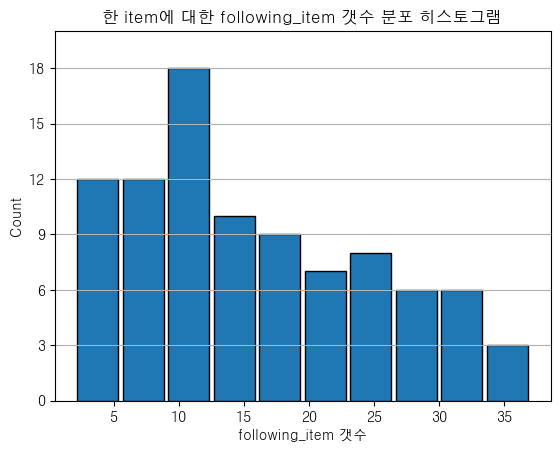

In [42]:


#df_pairs_mod.plot(kind='hist', bins=10)

# (최대값 - 최소값) / bins
# plt.hist(scores, bins =10) # bins = 10, 기본값
count, bins, container = plt.hist(df_pairs_mod['size'], bins=10, edgecolor='k', rwidth=.9) # 
print('count :', count) # count : [    1.   2.   1.     3.   3.     3.   2.     5.]
print('bins :', bins)   # bins :  [60. 64.25 68.5  72.75 77.   81.25 85.5  89.75 94.  ]
print('container :', container) # container : <BarContainer object of 8 artists>


# for i in range(8):
for i in range(len(bins)-1):
    print(f'{bins[i]} ~ {bins[i+1]} : {int(count[i])}개')

plt.xlabel('following_item 갯수')
plt.ylabel('Count')
plt.ylim([0, 20])
plt.yticks([0, 3, 6, 9, 12, 15, 18])
plt.grid(axis='y')

plt.title("한 item에 대한 following_item 갯수 분포 히스토그램")
plt.show()

count : [  6.  41. 116. 169.   0.   0.   0.   0.   0.   0.   0.   0.   0. 299.
 412. 204. 107.  52.  13.   6.]
bins : [-0.70833733 -0.62648981 -0.54464228 -0.46279476 -0.38094723 -0.29909971
 -0.21725218 -0.13540466 -0.05355713  0.02829039  0.11013792  0.19198544
  0.27383296  0.35568049  0.43752801  0.51937554  0.60122306  0.68307059
  0.76491811  0.84676564  0.92861316]
container : <BarContainer object of 20 artists>


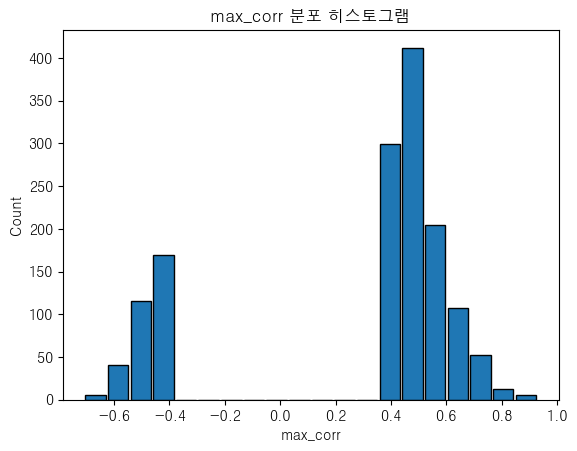

In [43]:
# (최대값 - 최소값) / bins
# plt.hist(scores, bins =10) # bins = 10, 기본값
count, bins, container = plt.hist(pairs_mod['max_corr'], bins=20, edgecolor='k', rwidth=.9) # 
print('count :', count) # count : [    1.   2.   1.     3.   3.     3.   2.     5.]
print('bins :', bins)   # bins :  [60. 64.25 68.5  72.75 77.   81.25 85.5  89.75 94.  ]
print('container :', container) # container : <BarContainer object of 8 artists>


# for i in range(len(bins)-1):
#     print(f'{bins[i]} ~ {bins[i+1]} : {int(count[i])}개')

plt.xlabel('max_corr')
plt.ylabel('Count')
# plt.ylim([0, 20])
# plt.yticks([0, 3, 6, 9, 12, 15, 18])
#plt.grid(axis='y')

plt.title("max_corr 분포 히스토그램")
plt.show()

In [44]:
#####
##### case5) 다른 max_lag 값 테스트: max_lag=0 인 경우도 수용할 수 있도록 find_comovement_pairs 수정해서 그 결과를 살펴보자.
#####                               min_lag = 0
#####  기본값: find_comovement_pairs_mod(pivot, max_lag=6, min_lag = 1, min_nonzero=12, corr_threshold=0.4)
##### 


def find_comovement_pairs_mod(pivot, max_lag=6, min_lag = 1, min_nonzero=12, corr_threshold=0.4):
    items = pivot.index.to_list()
    months = pivot.columns.to_list()
    n_months = len(months)

    results = []

    for i, leader in tqdm(enumerate(items)):
        x = pivot.loc[leader].values.astype(float)
        if np.count_nonzero(x) < min_nonzero:
            continue

        for follower in items:
            if follower == leader:
                continue

            y = pivot.loc[follower].values.astype(float)
            if np.count_nonzero(y) < min_nonzero:
                continue

            best_lag = None
            best_corr = 0.0

            ## lag = 1 ~ max_lag 탐색
            #for lag in range(1, max_lag + 1):
            # lag = 0 ~ max_lag 탐색
            for lag in range(min_lag, max_lag + 1):
                if n_months <= lag:
                    continue
                if lag == 0: corr = safe_corr(x[:], y[lag:])
                else: corr = safe_corr(x[:-lag], y[lag:])
                
                if abs(corr) > abs(best_corr):
                    best_corr = corr
                    best_lag = lag

            # 임계값 이상이면 공행성쌍으로 채택
            if best_lag is not None and abs(best_corr) >= corr_threshold:
                results.append({
                    "leading_item_id": leader,
                    "following_item_id": follower,
                    "best_lag": best_lag,
                    "max_corr": best_corr,
                })

    pairs = pd.DataFrame(results)
    return pairs


pairs_minlag0 = find_comovement_pairs_mod(pivot, min_lag=0)
print("탐색된 공행성쌍 수:", len(pairs_minlag0))
pairs_minlag0['max_corr_abs'] = pairs_minlag0['max_corr'].apply(np.abs)
display(pairs_minlag0.describe())
pairs_minlag0.head(3)

100it [00:07, 13.09it/s]

탐색된 공행성쌍 수: 1629


,best_lag,max_corr,max_corr_abs
count,1629.000000,1629.000000,1629.000000
mean,2.953959,0.293203,0.501645
std,2.121255,0.417128,0.090637
min,0.000000,-0.708337,0.400055
25%,1.000000,0.404067,0.432921
50%,3.000000,0.453228,0.475987
75%,5.000000,0.532847,0.547601
max,6.000000,0.928613,0.928613


,leading_item_id,following_item_id,best_lag,max_corr,max_corr_abs
0,AANGBULD,APQGTRMF,5,-0.443984,0.443984
1,AANGBULD,BEZYMBBT,0,-0.415233,0.415233
2,AANGBULD,DEWLVASR,6,0.640221,0.640221


In [45]:

# ### 2025/11/14 submission 용
# pairs_submit2 = find_comovement_pairs(pivot,  max_lag=6, min_nonzero=12, corr_threshold=0.35)
# print("탐색된 공행성쌍 수:", len(pairs_submit2))
# pairs_submit2['max_corr_abs'] = pairs_submit2['max_corr'].apply(np.abs)
# display(pairs_submit2.describe())
# pairs_submit2.head(3)

In [46]:
df_pairs_mod = pairs_minlag0.groupby('leading_item_id')['following_item_id'] \
    .aggregate(["size"]).sort_values(by='size', ascending=False) # or 'count'
df_pairs_mod    

dct_pair_detection = {'comv_yes':df_pairs_mod.index.to_list() , 
                      'comv_no': set(train['item_id']).difference(set(df_pairs_mod.index.to_list()))}
print("공행성이 탐지되지 않은 상품수: ", len(dct_pair_detection['comv_no']))
print("공행성이 탐지되지 않은 상품id: ", dct_pair_detection['comv_no'])
print("공행성 탐지된 상품수: ", len(dct_pair_detection['comv_yes']))
print("공행성이 탐지된 상품id: ", dct_pair_detection['comv_yes']) 
df_pairs_mod.describe()

공행성이 탐지되지 않은 상품수:  9
공행성이 탐지되지 않은 상품id:  {'RJCAXSGH', 'ANWUJOKX', 'PLMZALFA', 'KFQSHBNH', 'QSDCUCLB', 'TANNMIMB', 'GIKPEWTY', 'RUVXNNVA', 'GMBFCMIU'}
공행성 탐지된 상품수:  91
공행성이 탐지된 상품id:  ['DNMPSKTB', 'SDWAYPIK', 'QRKRBYJL', 'GYHKIVQT', 'QVLMOEYE', 'VBYCLTYZ', 'UGEQLMXM', 'JPBRUTWP', 'OKMBFVKS', 'ATLDMDBO', 'WBLJNPZQ', 'OGAFEHLU', 'XUOIQPFL', 'ZGJXVMNI', 'ZKENOUDA', 'BTMOEMEP', 'APQGTRMF', 'HXYSSRXE', 'LRVGFDFM', 'BLANHGYY', 'NZKBIBNU', 'AXULOHBQ', 'OXKURKXR', 'XIIEJNEE', 'RJGPVEXX', 'UXSPKBJR', 'BEZYMBBT', 'IGDVVKUD', 'DBWLZWNK', 'FQCLOEXA', 'EVBVXETX', 'BSRMSVTC', 'LSOIUSXD', 'DEWLVASR', 'ELQGMQWE', 'AANGBULD', 'RCBZUSIM', 'UIFPPCLR', 'ROACSLMG', 'FDXPMYGF', 'VMAQSTJE', 'LLHREMKS', 'SAHWCZNH', 'PYZMVUWD', 'BUZIIBYG', 'DJBLNPNC', 'FWUCPMMW', 'RAWUKQMJ', 'VUAFAIYJ', 'LPHPPJUG', 'HCDTGMST', 'CCLHWFWF', 'JBVHSUWY', 'LTOYKIML', 'LUENUFGA', 'KJNSOAHR', 'BJALXPFS', 'FRHNWLNI', 'WPQXWHYO', 'KEUWZRKO', 'KAGJCHMR', 'JSLXRQOK', 'WQMVCOEM', 'FTSVTTSR', 'AHMDUILJ', 'XIFHSOWQ', 'ZCELVYQU', 'UQYUIVVR', 

,size
count,91.000000
mean,17.901099
std,10.171917
min,2.000000
25%,10.000000
50%,15.000000
75%,25.500000
max,39.000000


In [47]:
# #####
# ##### case7) 다른 min_nonzero=12 값을 시도해 볼 필요있음 ==> 아마도 앞에 공행성이 탐지되지 않은 상품수:  9개는  min_nonzero<12 일 수 있음
# #####                               
# #####  기본값: find_comovement_pairs_mod(pivot, max_lag=6, min_lag = 1, min_nonzero=12, corr_threshold=0.4)
# ##### 

# pairs_minlag0_maxlag8_minNonzero3 = find_comovement_pairs_mod(pivot, min_lag=0, max_lag=8, min_nonzero=3)
# print("탐색된 공행성쌍 수:", len(pairs_minlag0_maxlag8_minNonzero3))
# pairs_minlag0_maxlag8_minNonzero3['max_corr_abs'] = pairs_minlag0_maxlag8_minNonzero3['max_corr'].apply(np.abs)
# display(pairs_minlag0_maxlag8_minNonzero3.describe())
# pairs_minlag0_maxlag8_minNonzero3.head(3)

In [48]:
# df_pairs_mod = pairs_minlag0_maxlag8_minNonzero3.groupby('leading_item_id')['following_item_id'] \
#     .aggregate(["size"]).sort_values(by='size', ascending=False) # or 'count'
# df_pairs_mod    

# dct_pair_detection = {'comv_yes':df_pairs_mod.index.to_list() , 
#                       'comv_no': set(train['item_id']).difference(set(df_pairs_mod.index.to_list()))}
# print("공행성이 탐지되지 않은 상품수: ", len(dct_pair_detection['comv_no']))
# print("공행성이 탐지되지 않은 상품id: ", dct_pair_detection['comv_no'])
# print("공행성 탐지된 상품수: ", len(dct_pair_detection['comv_yes']))
# print("공행성이 탐지된 상품id: ", dct_pair_detection['comv_yes']) 
# df_pairs_mod.describe()

## 4. 회귀 모델 학습
- 시계열 데이터 안에서 '한 달 뒤 총 무역량(value)을 맞추는 문제'로 self-supervised 학습
- 탐색된 모든 공행성쌍 (A,B)에 대해 월 t마다 학습 샘플 생성
- input X:
1) B_t (현재 총 무역량(value))
2) B_{t-1} (직전 달 총 무역량(value))
3) A_{t-lag} (lag 반영된 총 무역량(value))
4) max_corr, best_lag (관계 특성)
- target y:
1) B_{t+1} (다음 달 총 무역량(value))
- 이러한 모든 샘플을 합쳐 LinearRegression 회귀 모델을 학습

In [33]:
def build_training_data(pivot, pairs):
    """
    공행성쌍 + 시계열을 이용해 (X, y) 학습 데이터를 만드는 함수
    input X:
      - b_t, b_t_1, a_t_lag, max_corr, best_lag
    target y:
      - b_t_plus_1
    """
    months = pivot.columns.to_list()
    n_months = len(months)

    rows = []

    for row in pairs.itertuples(index=False):
        leader = row.leading_item_id
        follower = row.following_item_id
        lag = int(row.best_lag)
        corr = float(row.max_corr)

        if leader not in pivot.index or follower not in pivot.index:
            continue

        a_series = pivot.loc[leader].values.astype(float)
        b_series = pivot.loc[follower].values.astype(float)

        # t+1이 존재하고, t-lag >= 0인 구간만 학습에 사용
        for t in range(max(lag, 1), n_months - 1):
            b_t = b_series[t]
            b_t_1 = b_series[t - 1]
            a_t_lag = a_series[t - lag]
            b_t_plus_1 = b_series[t + 1]

            rows.append({
                "b_t": b_t,
                "b_t_1": b_t_1,
                "a_t_lag": a_t_lag,
                "max_corr": corr,
                "best_lag": float(lag),
                "target": b_t_plus_1,
            })

    df_train = pd.DataFrame(rows)
    return df_train

#df_train_model = build_training_data(pivot, pairs) # 생성된 학습 데이터의 shape : (54743, 6)
#df_train_model = build_training_data(pivot, pairs_submit)
df_train_model = build_training_data(pivot, pairs_minlag0)
print('생성된 학습 데이터의 shape :', df_train_model.shape)
df_train_model.head()

생성된 학습 데이터의 shape : (63277, 6)


,b_t,b_t_1,a_t_lag,max_corr,best_lag,target
0,582317.0,539873.0,14276.0,-0.443984,5.0,759980.0
1,759980.0,582317.0,52347.0,-0.443984,5.0,216019.0
2,216019.0,759980.0,53549.0,-0.443984,5.0,537693.0
3,537693.0,216019.0,0.0,-0.443984,5.0,205326.0
4,205326.0,537693.0,26997.0,-0.443984,5.0,169440.0


In [34]:
# 회귀모델 학습
feature_cols = ['b_t', 'b_t_1', 'a_t_lag', 'max_corr', 'best_lag']

train_X = df_train_model[feature_cols].values
train_y = df_train_model["target"].values

reg = LinearRegression()
reg.fit(train_X, train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 5. 회귀 모델 추론 및 제출(submission) 파일 생성
- 탐색된 공행성 쌍에 대해 후행 품목(following_item_id)에 대한 2025년 8월 총 무역량(value) 예측

In [35]:
def predict(pivot, pairs, reg):
    months = pivot.columns.to_list()
    n_months = len(months)

    # 가장 마지막 두 달 index (2025-7, 2025-6)
    t_last = n_months - 1
    t_prev = n_months - 2

    preds = []

    for row in tqdm(pairs.itertuples(index=False)):
        leader = row.leading_item_id
        follower = row.following_item_id
        lag = int(row.best_lag)
        corr = float(row.max_corr)

        if leader not in pivot.index or follower not in pivot.index:
            continue

        a_series = pivot.loc[leader].values.astype(float)
        b_series = pivot.loc[follower].values.astype(float)

        # t_last - lag 가 0 이상인 경우만 예측
        if t_last - lag < 0:
            continue

        b_t = b_series[t_last]
        b_t_1 = b_series[t_prev]
        a_t_lag = a_series[t_last - lag]

        X_test = np.array([[b_t, b_t_1, a_t_lag, corr, float(lag)]])
        y_pred = reg.predict(X_test)[0]

        # (후처리 1) 음수 예측 → 0으로 변환
        # (후처리 2) 소수점 → 정수 변환 (무역량은 정수 단위)
        y_pred = max(0.0, float(y_pred))
        y_pred = int(round(y_pred))

        preds.append({
            "leading_item_id": leader,
            "following_item_id": follower,
            "value": y_pred,
        })

    df_pred = pd.DataFrame(preds)
    return df_pred

In [36]:
#submission = predict(pivot, pairs, reg)
#submission.head()

#submission_submit = predict(pivot, pairs_submit, reg)
submission_submit = predict(pivot, pairs_minlag0, reg)
submission_submit.head()

1629it [00:00, 5164.69it/s]


,leading_item_id,following_item_id,value
0,AANGBULD,APQGTRMF,320217
1,AANGBULD,BEZYMBBT,3232327
2,AANGBULD,DEWLVASR,568906
3,AANGBULD,DNMPSKTB,4992737
4,AANGBULD,EVBVXETX,4882543


In [37]:
#submission.to_csv('./baseline_submit.csv', index=False)
#submission_submit.to_csv('../data/submit20251113_pyy.csv', index=False)
submission_submit.to_csv('../data/submit20251114_pyy.csv', index=False)